In [71]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from random import sample
from numpy.random import uniform
from math import isnan

from yellowbrick.cluster import KElbowVisualizer

In [72]:
# TODO: sheet_name change
original_df= pd.read_excel('newdata.xlsx', sheet_name='TAXONOMY DATA')
original_df

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Community,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Governance,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Treasury,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,Membership,NaN,NaN,NaN,NaN,Meta Information,Token,NaN,...,NaN,NaN,Voting,NaN,NaN,Meta Information,NaN,NaN,Setup,NaN
1,Responsible,DAOs,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
2,CHRISTIAN,Uniswap,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,...,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,Yes,No
3,CHRISTIAN,Compound,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,...,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
4,CHRISTIAN,Aave,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,...,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MIGO,Nervos Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,MIGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,MIGO,Stratis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,MIGO,Ox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
datasize = 72
df = original_df.iloc[1:]
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.iloc[:datasize]
df = df.iloc[:, 2:22]
df

1,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,Entry Barriers,is fully Public,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
2,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,Yes,No
3,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Manual,Allowlist,No,#Tokens Owned,None,Very,Yes,Services,Yes,No
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Manual,#Tokens Owned,No,#Tokens Owned,None,None,Yes,Services,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Token Ownership,Community,No,Pseudonymous,Other Token,Community Building and Engagement,Singular,Capped,Ownership,Yes,Manual,Allowlist,No,Per Individual,Per Address,Very,Yes,Services,No,Yes
70,Invitation,Decider,No,Pseudonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Manual,Allowlist,No,#Tokens Owned,None,Very,No,Services,Yes,No
71,Token Ownership,Community,No,Anonymous,Other Token,Community Building and Engagement,Singular,Uncapped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,Very,No,Token Sales,No,Yes
72,Open,Profit from Tokens,No,Anonymous,Other Token,Product Building and Management,Primary and Reputation,Capped,Ownership,No,Automatic,Allowlist,No,#Tokens Owned,None,Very,No,Services,No,Yes


In [74]:
cluster_size = 6

In [75]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df).toarray())

In [76]:
pca = PCA(n_components=cluster_size)
pca.fit(encoder_df)
pca_samples = pca.transform(encoder_df)

In [77]:
ps = pd.DataFrame(pca_samples)

In [78]:
tocluster = pd.DataFrame(ps[[4,0]])

clusterer = KMeans(n_clusters=cluster_size,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_

In [79]:
kmeans = KMeans(n_clusters=cluster_size, random_state=42)
cluster_kmeans = kmeans.fit_predict(ps)
cluster_kmeans

array([1, 2, 2, 5, 1, 2, 1, 0, 3, 3, 3, 3, 3, 0, 4, 4, 4, 2, 5, 2, 3, 3,
       3, 2, 0, 2, 2, 2, 1, 2, 1, 3, 2, 0, 1, 2, 5, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5,
       5, 3, 5, 3, 2, 2], dtype=int32)

In [80]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1.5,min_samples=3,metric='euclidean')
dbscan=db.fit(ps)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  1,  1,  1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0, -1,  0,  0])

In [96]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=cluster_size, linkage='ward').fit(encoder_df)
agglomerative_clustering.labels_

array([1, 1, 1, 3, 3, 4, 1, 0, 5, 5, 5, 5, 1, 0, 0, 0, 0, 1, 3, 4, 5, 5,
       5, 4, 4, 1, 1, 4, 4, 4, 3, 4, 4, 0, 3, 4, 3, 0, 3, 4, 3, 3, 3, 3,
       0, 4, 4, 4, 0, 3, 4, 3, 0, 4, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 2,
       2, 5, 3, 1, 4, 1])

In [82]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=cluster_size)
gmm.fit(ps)

# predict the cluster for each data point
cluster_gmm = gmm.predict(ps)
cluster_gmm

array([2, 1, 1, 5, 2, 0, 2, 4, 3, 3, 3, 1, 3, 4, 4, 4, 4, 0, 5, 0, 3, 3,
       3, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 4, 2, 0, 5, 4, 2, 1, 2, 2, 2, 2,
       4, 0, 0, 0, 4, 2, 0, 2, 4, 0, 2, 4, 5, 1, 1, 5, 5, 5, 5, 3, 5, 5,
       5, 3, 5, 4, 0, 0])

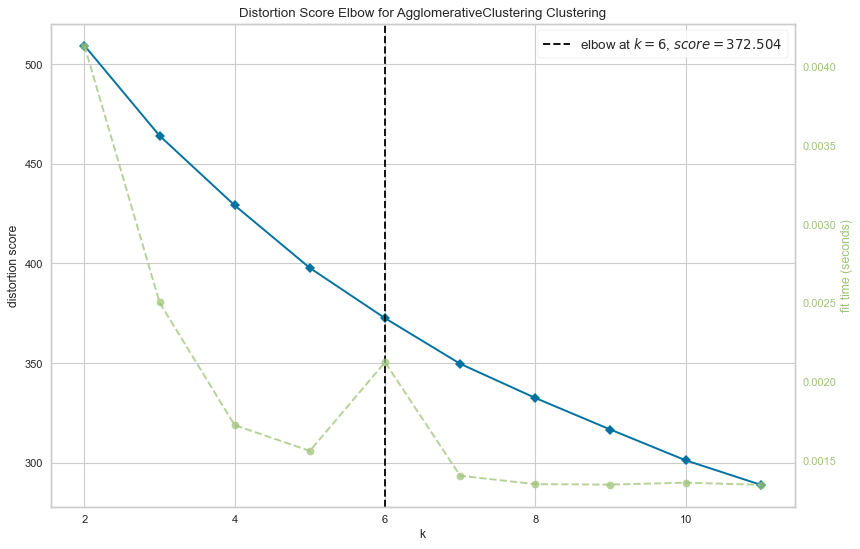

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
visualizer = KElbowVisualizer(AgglomerativeClustering(), k=(2,12))

visualizer.fit(encoder_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [84]:
X = df
from sklearn.preprocessing import LabelEncoder

X.iloc[:]=X.iloc[:].apply(LabelEncoder().fit_transform)
X

1,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,Entry Barriers,is fully Public,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
2,1,2,0,0,0,2,1,0,2,1,0,0,1,0,0,0,1,1,1,0
3,1,2,0,0,0,2,1,0,2,1,0,0,1,0,0,0,1,1,0,1
4,1,2,0,0,0,2,1,0,2,1,0,0,1,0,0,0,1,1,0,1
5,1,2,0,0,0,2,1,0,2,1,1,1,0,0,0,2,1,1,1,0
6,1,2,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,0,0,2,1,0,1,0,2,1,1,1,0,2,1,2,1,1,0,1
70,0,1,0,2,0,2,1,0,2,1,1,1,0,0,0,2,0,1,1,0
71,2,0,0,0,1,0,1,1,2,1,0,0,1,0,0,2,0,2,0,1
72,1,2,0,0,1,2,0,0,2,0,0,1,0,0,0,2,0,1,0,1


In [85]:
sc = StandardScaler()
scaled_data = X.copy()
scaled_data = sc.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,-0.928985,1.057188,0.118678,1.118034,-1.217686
1,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,-0.928985,1.057188,0.118678,-0.894427,0.821230
2,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,-0.928985,1.057188,0.118678,-0.894427,0.821230
3,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,0.620174,0.436436,-0.577350,-0.417878,-0.301511,1.194410,1.057188,0.118678,1.118034,-1.217686
4,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,0.620174,-0.872872,-0.577350,-0.417878,-0.301511,-0.928985,1.057188,0.118678,1.118034,-1.217686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.727415,-1.623442,-0.353553,0.583414,0.824260,-1.901340,0.328165,-0.424650,-0.268112,0.301511,0.620174,0.436436,-0.577350,3.121797,3.316625,1.194410,1.057188,0.118678,-0.894427,0.821230
68,-2.350417,-0.430709,-0.353553,0.583414,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,0.620174,0.436436,-0.577350,-0.417878,-0.301511,1.194410,-0.945905,0.118678,1.118034,-1.217686
69,1.727415,-1.623442,-0.353553,-1.816919,0.824260,-1.901340,0.328165,2.354879,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,1.194410,-0.945905,1.827644,-0.894427,0.821230
70,-0.311501,0.762024,-0.353553,-1.816919,0.824260,0.657473,-3.047247,-0.424650,-0.268112,-3.316625,-1.612452,0.436436,-0.577350,-0.417878,-0.301511,1.194410,-0.945905,0.118678,-0.894427,0.821230


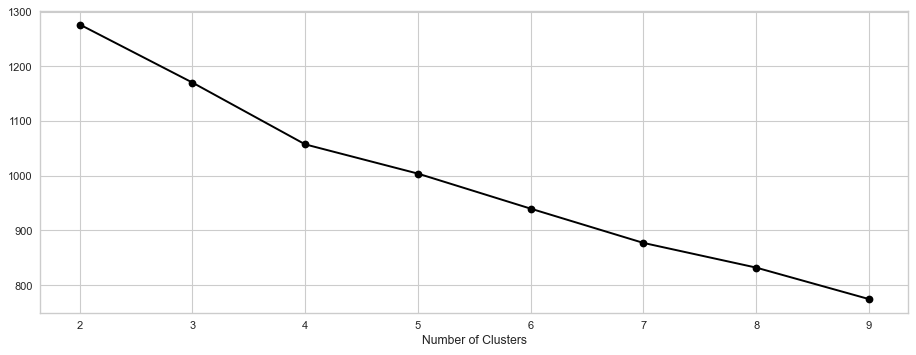

In [93]:
pca2 = PCA(n_components=5)
pca2.fit(encoder_df)
pca_samples2 = pca2.transform(encoder_df)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
cluster = range(2,10)
inertias = []
for k in cluster:
    model = KMeans(n_clusters=k)    
    model.fit(scaled_data)                    
    inertias.append(model.inertia_) 
    
plt.plot(cluster, inertias, '-o', color='black') 
plt.xlabel('Number of Clusters')
plt.xticks(cluster)
plt.show()

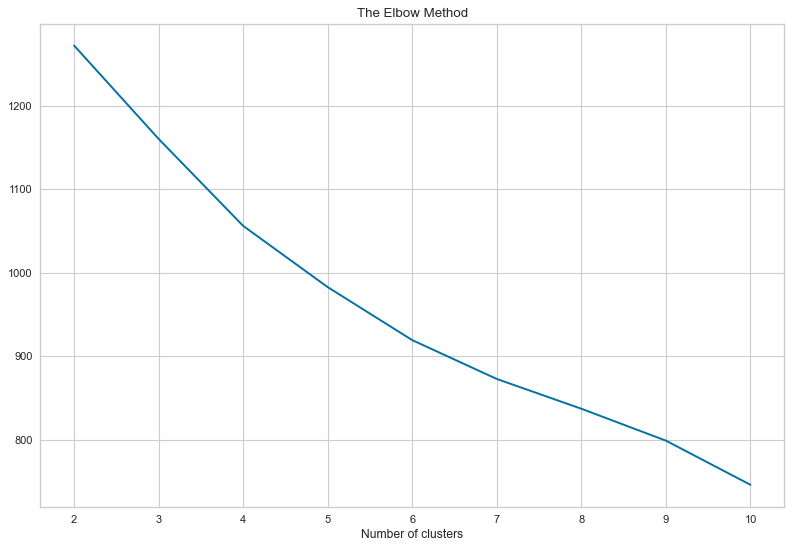

In [94]:
from sklearn.cluster import KMeans

cs = []
for i in range(2, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    model.fit(scaled_data)
    cs.append(model.inertia_)
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

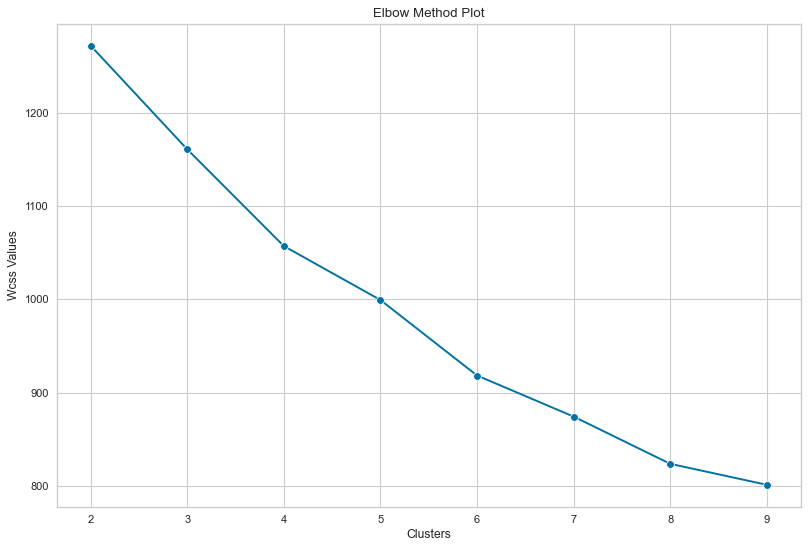

In [95]:
import seaborn as sns

wcss = []

for i in range(2, 10):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state=42
    )
    kmeans.fit(scaled_data)
    wcss.append([i, kmeans.inertia_]) # kmeans.inertial_ returns the calculated WCSS Values
    
wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])

# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.xticks(np.arange(2, 10))
plt.xlabel("Clusters")
plt.ylabel("Wcss Values")
plt.title("Elbow Method Plot")
plt.show()

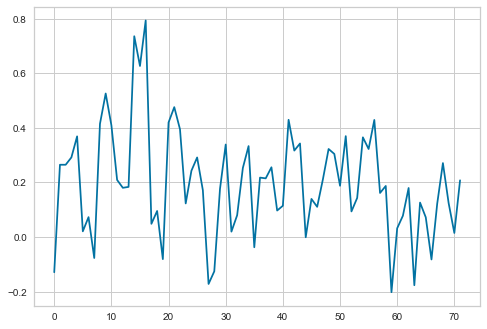

Sil score for current clustering n= 6 : 0.19889030065216995
Davis Bouldin score for current clustering n= 6 : 1.907501267663024
N-Clusters Lower is better --  Higher is better
2  --  2.188134834458255  --  0.2343129593784355
3  --  2.55215760285757  --  0.15969169879078507
4  --  2.2665525568413876  --  0.16588349610808814
5  --  1.9502147158966516  --  0.19935554224119129
6  --  1.907501267663024  --  0.19889030065216995
7  --  1.9325822356164235  --  0.19236887705581818


In [14]:
sil_score = silhouette_score(encoder_df, agglomerative_clustering.labels_, metric="sqeuclidean")
sil_samples = silhouette_samples(encoder_df, agglomerative_clustering.labels_, metric="sqeuclidean")

fig = plt.plot(sil_samples)
plt.show()

print('Sil score for current clustering', 'n=', cluster_size, ':', sil_score)

d_score = davies_bouldin_score(encoder_df, agglomerative_clustering.labels_)

print('Davis Bouldin score for current clustering', 'n=', cluster_size, ':', d_score)

print('N-Clusters', 'Lower is better -- ', 'Higher is better')
for x in range (2, 8):
    rangecluster = AgglomerativeClustering(n_clusters=x, linkage='ward').fit(encoder_df)
    print(x, ' -- ', davies_bouldin_score(encoder_df, rangecluster.labels_), ' -- ', silhouette_score(encoder_df, rangecluster.labels_, metric="sqeuclidean"))


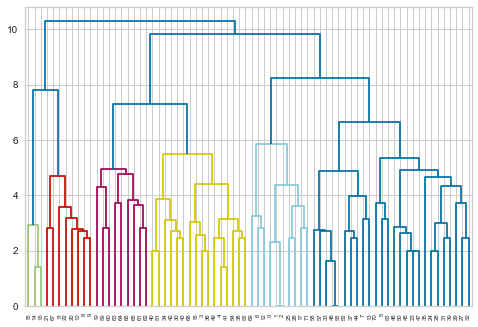

In [15]:
dend = shc.dendrogram(shc.linkage(encoder_df, method='ward'))

In [16]:
# group clusters for agglomerative clustering
cluster_df = [0] * cluster_size
for i in range (cluster_size):
    cluster_df[i] = pd.DataFrame(columns=df.columns)

for id, value in enumerate(agglomerative_clustering.labels_):
    cluster_df[value] = pd.concat([cluster_df[value], df.iloc[[id]]])

c_array = []
for x in range (cluster_size):
    c_array.append(cluster_df[x].mode())

final_df = pd.concat(c_array)
final_df = final_df.drop([1])

cluster_measures = []
for x in range (cluster_size):
    cluster_measures.append(f'Cluster {x + 1}: {int(np.floor(len(cluster_df[x])/len(df)*100))}%')

final_df.index=(tuple(cluster_measures))
final_df = final_df.transpose()
print('Agglomerative Distribution')
final_df

Agglomerative Distribution


,Cluster 1: 36%,Cluster 2: 13%,Cluster 3: 12%,Cluster 4: 22%,Cluster 5: 4%,Cluster 6: 11%
1,,,,,,
Access,Open,Open,Open,Open,Invitation,Token Ownership
Type,Profit from Tokens,Community,Community,Profit from Tokens,Decider,Community
Is hierachical,No,No,No,No,No,No
Anonymity,Pseudonymous,Anonymous,Pseudonymous,Pseudonymous,Known,Pseudonymous
Contributor Rewards,Governance Token,Governance Token,Governance Token,Governance Token,Governance Token,Other Token
Purpose,Product Building and Management,Product Building and Management,Product Building and Management,Product Building and Management,Investing or Fund Raising,Community Building and Engagement
Token Type,Singular,Singular,Singular,Singular,Singular,Singular
Supply Cap,Capped,Capped,Capped,Capped,Capped,Capped
Entry Barriers,Ownership,Ownership,Ownership,Ownership,Invitation,Ownership


In [17]:
# group clusters for kmeans clustering
cluster_df = [0] * cluster_size
for i in range (cluster_size):
    cluster_df[i] = pd.DataFrame(columns=df.columns)

for id, value in enumerate(cluster_kmeans):
    cluster_df[value] = pd.concat([cluster_df[value], df.iloc[[id]]])

c_array = []
for x in range (cluster_size):
    c_array.append(cluster_df[x].mode())

kmeans_df = pd.concat(c_array)
kmeans_df = kmeans_df.drop([1])

cluster_measures = []
for x in range (cluster_size):
    cluster_measures.append(f'Cluster {x + 1}: {int(np.floor(len(cluster_df[x])/len(df)*100))}%')

kmeans_df.index=(tuple(cluster_measures))
kmeans_df = kmeans_df.transpose()
print('KMeans Distribution')
kmeans_df

KMeans Distribution


,Cluster 1: 29%,Cluster 2: 16%,Cluster 3: 20%,Cluster 4: 13%,Cluster 5: 15%,Cluster 6: 4%
1,,,,,,
Access,Open,Open,Open,Token Ownership,Open,Invitation
Type,Profit from Tokens,Profit from Tokens,Profit from Tokens,Community,Profit from Tokens,Decider
Is hierachical,No,No,No,No,No,No
Anonymity,Pseudonymous,Pseudonymous,Pseudonymous,Pseudonymous,Pseudonymous,Known
Contributor Rewards,Governance Token,Governance Token,Governance Token,Other Token,Other Token,Governance Token
Purpose,Product Building and Management,Product Building and Management,Product Building and Management,Community Building and Engagement,Product Building and Management,Investing or Fund Raising
Token Type,Singular,Singular,Singular,Singular,Singular,Singular
Supply Cap,Capped,Capped,Capped,Capped,Capped,Capped
Entry Barriers,Ownership,Ownership,Ownership,Ownership,Ownership,Invitation


In [18]:
df['PCA'] = cluster_kmeans
df['Agglomerative'] = agglomerative_clustering.labels_
df['DBSCAN'] = dbscan.labels_
df['GMM'] = cluster_gmm
df['DAO'] = original_df['Unnamed: 1']
df

1,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,Entry Barriers,is fully Public,...,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale,PCA,Agglomerative,DBSCAN,GMM,DAO
2,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,Yes,No,1,1,0,0,Uniswap
3,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,No,Yes,4,1,0,2,Compound
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,No,Yes,4,1,0,2,Aave
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,Very,Yes,Services,Yes,No,2,3,0,5,Badger
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,Yes,No,1,3,0,0,SushiChef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Token Ownership,Community,No,Pseudonymous,Other Token,Community Building and Engagement,Singular,Capped,Ownership,Yes,...,Very,Yes,Services,No,Yes,3,5,-1,4,Developer DAO
70,Invitation,Decider,No,Pseudonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,Very,No,Services,Yes,No,2,3,0,5,KeeperDAO
71,Token Ownership,Community,No,Anonymous,Other Token,Community Building and Engagement,Singular,Uncapped,Ownership,Yes,...,Very,No,Token Sales,No,Yes,4,1,-1,4,Nouns DAO
72,Open,Profit from Tokens,No,Anonymous,Other Token,Product Building and Management,Primary and Reputation,Capped,Ownership,No,...,Very,No,Services,No,Yes,4,0,0,2,Popcorn


In [19]:
df.to_excel('output_Migo.xlsx', sheet_name='Clusters')